# Import modules

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/1-notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

# Import metaboigniter peak table

In [53]:
peakTable_metaboigniter = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter-186_samples.csv',
                                  sep=',', decimal='.', na_values='NA')
print(peakTable_metaboigniter.shape)
peakTable_metaboigniter.head()

(186, 1501)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201


In [54]:
X = peakTable_metaboigniter.iloc[:, ['variable' in col for col in peakTable_metaboigniter.columns]]
print(X.shape)
X.head()

(186, 557)


,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,19.761786,14.635833,22.185582,16.414744,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,19.735279,15.193396,20.831414,15.052533,NaN,15.145423,14.034654,17.953780,NaN,15.907714,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,19.116076,15.446714,22.152604,16.410827,NaN,14.628890,15.316772,17.404715,12.786407,15.947176,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,19.376875,15.460525,22.169389,16.403964,12.720767,15.937169,15.967749,15.836957,NaN,16.371211,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,19.555938,14.515536,22.150249,16.372219,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201


In [55]:
metadata = peakTable_metaboigniter.iloc[:, ['variable' not in col for col in peakTable_metaboigniter.columns]]
print(metadata.shape)
metadata.head()

(186, 944)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.158730
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,0.0,-0.038618,-0.388618,0.677993,0.0,1.0,0.0,0.0,1.0,1.000000
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,1.0,1.284089,NaN,3.611377,1.0,0.0,2.0,0.0,2.0,0.857418
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,0.0,1.053347,0.863347,2.371083,1.0,0.0,2.0,1.0,3.0,0.837792
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,1.0,0.009881,NaN,1.009930,0.0,0.0,2.0,0.0,2.0,1.134635


# In metaboigniter results (variable identification), different features/variables (noted *variable_XXX*) can correspond to the same compound. 

## Here, for a same compound, we want to remove features/variables (noted *variable_XXX*) with a too strong positive correlation to already reduce dimensionality in the peak table

In [56]:
variable_identification = pd.read_csv(pwd + 'data/HILIC_POS_results/process_output_quantid_pos_camera_metfrag/varsPOSout_pos_metfrag.txt', sep='\t', decimal='.', na_values='NA')
variable_identification

,variableMetadata,parentMZ,parentRT,Score,MonoisotopicMass,SMILES,InChIKey,Name,NoExplPeaks,NumberPeaksUsed,...,xcmsCamera_mzmin,xcmsCamera_mzmax,xcmsCamera_rt,xcmsCamera_rtmin,xcmsCamera_rtmax,xcmsCamera_npeaks,xcmsCamera_isotopes,xcmsCamera_adduct,xcmsCamera_pcgroup,imputed
0,variable_3,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,61.039608,61.039794,93.3840,92.664,94.640,211,NaN,NaN,36,No
1,variable_5,62.0601,276.539,2.0,61.052764,NCCO,HZAXFHJVJLSVMW-UHFFFAOYSA-N,Ethanolamine,40,175,...,62.059914,62.060261,275.0040,273.825,275.644,210,NaN,NaN,56,No
2,variable_6,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,64.015582,64.016015,299.3860,195.740,317.234,272,[1][M]+,NaN,22,yes
3,variable_7,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,65.018672,65.019122,299.3890,276.857,300.455,213,[1][M+1]+,NaN,22,yes
4,variable_8,61.0398,93.949,2.0,60.032363,NC(N)=O,XSQUKJJJFZCRTK-UHFFFAOYSA-N,Urea,31,52,...,65.018564,65.019229,93.3840,39.738,94.640,154,NaN,NaN,36,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,variable_2365,288.2907,58.514,2.0,270.255880,CCCCCCCCCCCCCCCCC(O)=O,KEMQGTRYUADPNZ-UHFFFAOYSA-N,Margaric acid (17:0),136,392,...,1109.058605,1109.063525,64.1250,63.258,64.813,111,NaN,NaN,10,yes
553,variable_2368,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,1110.784086,1110.788437,299.6370,298.698,300.660,179,NaN,NaN,22,yes
554,variable_2370,288.2907,58.514,2.0,270.255880,CCCCCCCCCCCCCCCCC(O)=O,KEMQGTRYUADPNZ-UHFFFAOYSA-N,Margaric acid (17:0),136,392,...,1129.561770,1129.566054,62.9080,62.039,63.575,123,NaN,NaN,10,yes
555,variable_2375,140.0682,304.407,2.0,117.078979,NCCCCC(O)=O,JJMDCOVWQOJGCB-UHFFFAOYSA-N,delta-Aminovaleric acid,115,287,...,1144.776441,1144.781069,299.9940,298.776,300.661,131,NaN,NaN,22,yes


On the following heatmap, we can observe the correlations between all features

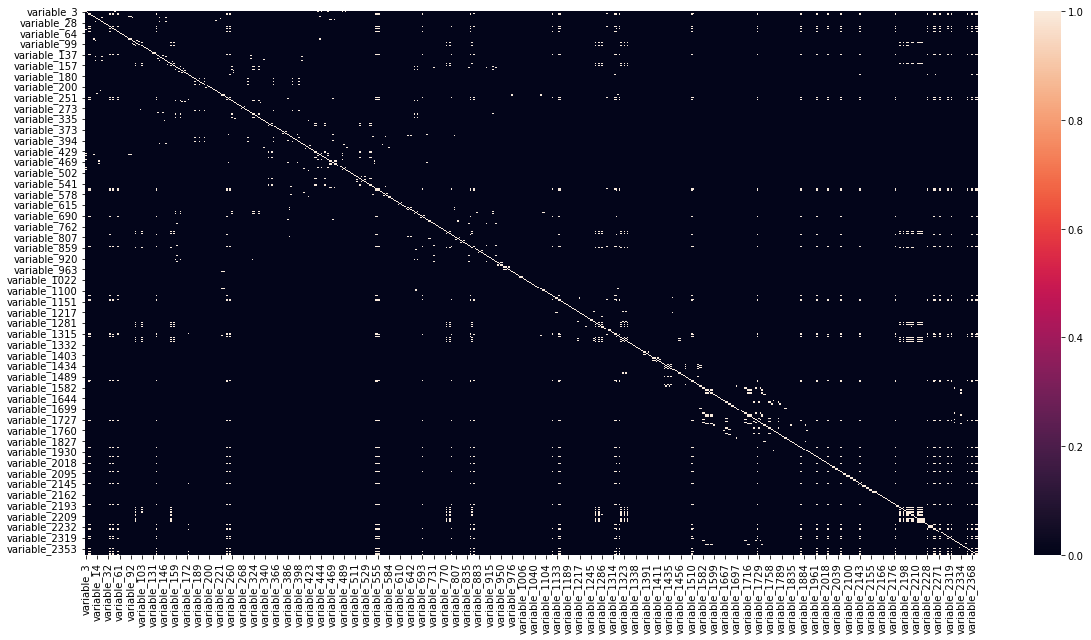

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap((X.corr(method='pearson') > 0.9) | (X.corr(method='pearson') < -0.9));

Many of these correlations are due to the fact that distinct variables correspond to the same compound (adducts). The following function (<code>remove_redundant_features</code>) removes, for each compound, the features with a correlation greater than 0.9

We can use different methods in the function, specified in the argument <code>corr_method</code> (default <code>spearman</code>) :
- <code>pearson</code> : measures the linear relationship between two variables
- <code>spearman</code> : measures the statistical dependence between the rankings of two variables i.e. described using a monotonic function
- <code>kendall</code> : also measures a rank correlation

Spearman and Kendall methods are more robust because they don't make the assumption that the data follows a normal distribution.

In [58]:
def remove_redundant_features(variable_identification, X, corr_method='spearman'):
    
    available_methods = ['pearson', 'kendall', 'spearman']
    assert corr_method in available_methods, f'Correlation method must be one of : {available_methods}'
    
    print(120 * '-')
    
    col_to_keep = []
    count = variable_identification['Name'].value_counts(ascending=False)
    compound_for_plot = count[count.values < 30].index[0]
    
    
    for compound in variable_identification['Name'].unique():
    
        subset = variable_identification[variable_identification['Name'] == compound]
        variables = subset['variableMetadata']
        X_subset = X[variables.values]

        corr = X_subset.corr(method=corr_method)
        
        if compound == compound_for_plot:
            print(f'----- Example for compound <{compound_for_plot}> :\n')

            plt.figure(figsize=(16, 10))
            sns.heatmap(corr, annot=True, fmt='.1g')
            plt.xticks(rotation=90)
            plt.yticks(rotation=0)
            plt.title(f'Correlations between features for compound <{compound_for_plot}>', fontsize = 18)
            plt.show()
        


        columns = np.full((corr.shape[0],), True, dtype=bool)
        for i in range(corr.shape[0]):
            for j in range(i+1, corr.shape[0]):
                if corr.iloc[i,j] >= 0.9:
                    if columns[j]:
                        columns[j] = False
                        
                        
        selected_columns = subset['variableMetadata'][columns].values
        X_subset[selected_columns]
        col_to_keep.extend(selected_columns)
        

        if compound == compound_for_plot:
            print('\n')
            plt.figure(figsize=(16, 10))
            sns.heatmap(X_subset[selected_columns].corr(method=corr_method), annot=True, fmt='.2f')
            plt.xticks(rotation=90)
            plt.yticks(rotation=0)
            plt.title(f'Correlations between features for compound <{compound_for_plot}> \n after removing ones with strong positive correlation', fontsize = 18)
            plt.show()

            #print(f"Adducts : {subset['xcmsCamera_isotopes'].unique()}")
            
    print()
    print(f'----- Initially, we had {len(X.columns)} features in the peak table.')
    print(f'----- After removing ones with strong positive correlationn, we have {len(col_to_keep)} features left.\n')
    
    col_to_keep = X.columns[X.columns.isin(col_to_keep)].values
    
    
    return X[col_to_keep]

------------------------------------------------------------------------------------------------------------------------
----- Example for compound <Lysophosphatidylcholine C20:4> :



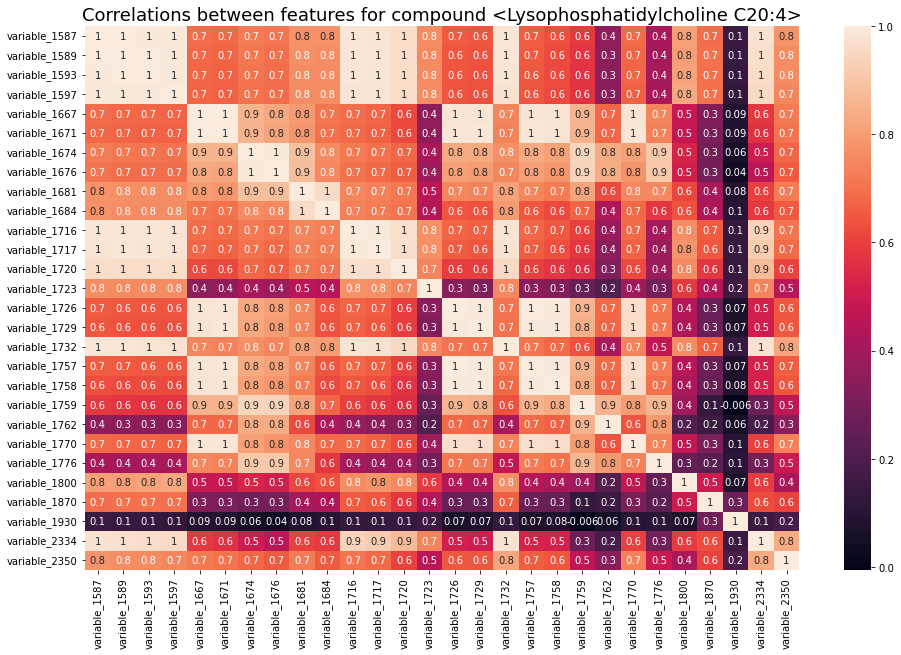

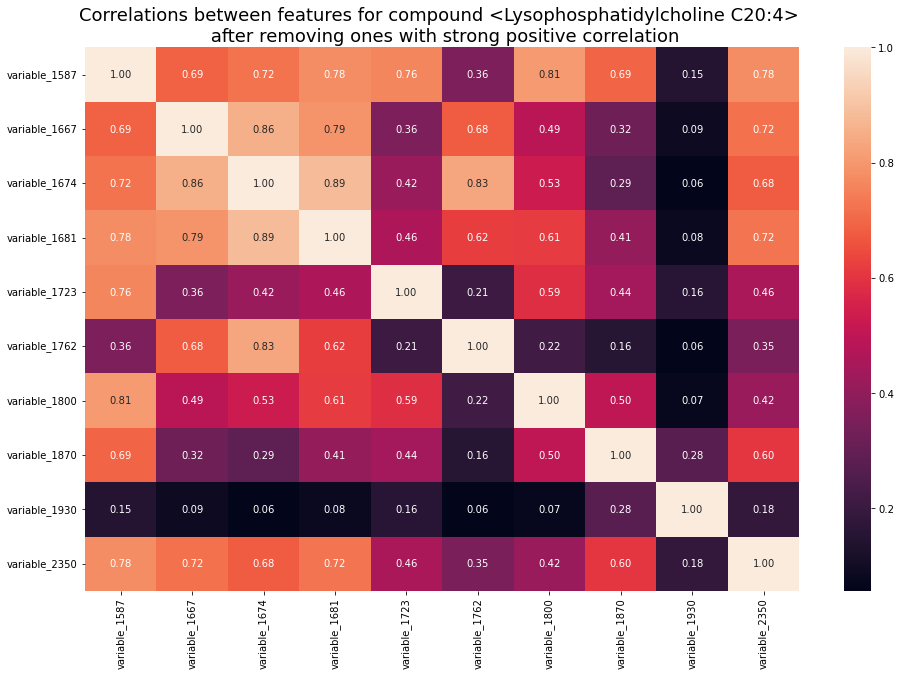


----- Initially, we had 557 features in the peak table.
----- After removing ones with strong positive correlationn, we have 337 features left.



,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,19.761786,14.635833,22.185582,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,16.805842,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,19.735279,15.193396,20.831414,NaN,15.145423,14.034654,17.953780,NaN,15.907714,14.977232,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,19.116076,15.446714,22.152604,NaN,14.628890,15.316772,17.404715,12.786407,15.947176,16.238502,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.376875,15.460525,22.169389,12.720767,15.937169,15.967749,15.836957,NaN,16.371211,17.052231,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,19.555938,14.515536,22.150249,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,16.107590,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,15.352711,...,NaN,12.125251,NaN,12.686218,12.349299,11.505004,13.189121,NaN,NaN,NaN
182,19.301954,14.839941,21.085175,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,15.953391,...,13.428278,12.629126,12.360380,NaN,12.909283,12.642143,NaN,12.708850,12.462751,12.635066
183,19.170626,14.291711,21.381912,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,15.522875,...,13.213899,NaN,11.870228,12.680070,12.846355,13.243400,NaN,12.199647,NaN,12.258149
184,18.869505,14.440576,20.961485,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,14.859646,...,12.442173,12.291946,NaN,NaN,12.477753,11.789382,NaN,11.628154,NaN,NaN


In [59]:
X_remove_corr = remove_redundant_features(variable_identification, X, corr_method='spearman')
X_remove_corr

After removing redundant features, we can see that we reduced the number of features with strong positive correlation

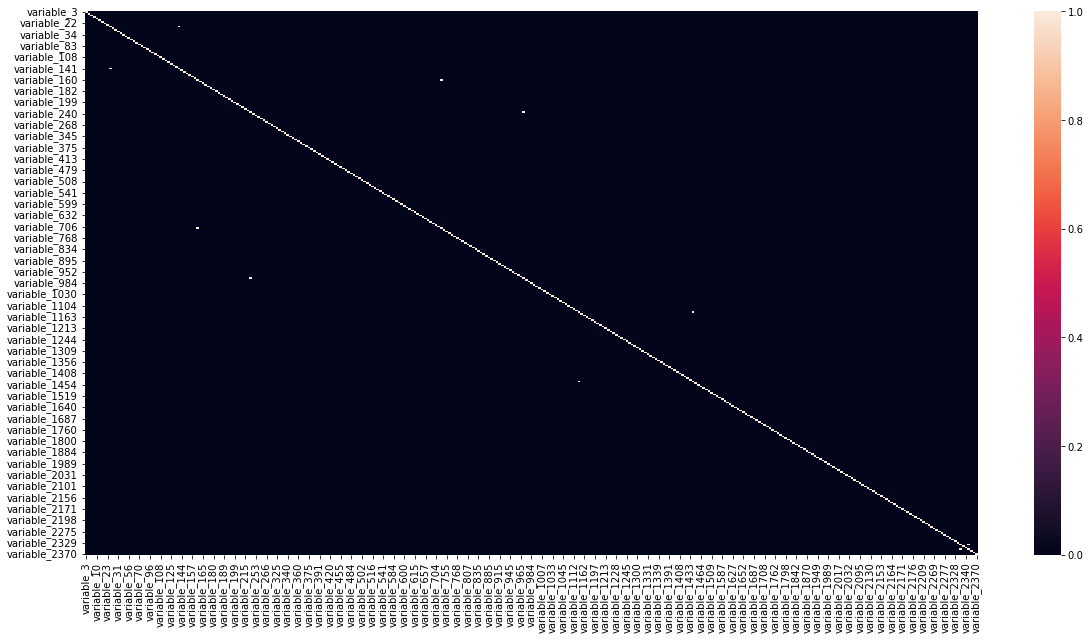

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap((X_remove_corr.corr(method='spearman') > 0.9) | (X_remove_corr.corr(method='spearman') < -0.9));

In [61]:
peakTable_metaboigniter_remove_corr = metadata.join(X_remove_corr)
print(peakTable_metaboigniter_remove_corr.shape)
peakTable_metaboigniter_remove_corr.head()

(186, 1281)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN


In [63]:
peakTable_metaboigniter_remove_corr.to_csv(pwd +
                                           'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter-186_samples-remove_corr.csv',
                                           index = False, header=True)